In [72]:
#Loading of the libraries
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredError
from sklearn.metrics import accuracy_score

In [73]:
#Loading of the Dataset
TRAIN_DATA_PATH = 'AER_G_dataset-PTC_training2.csv'
TEST_DATA_PATH = 'AER_G_dataset-PTC_test2.csv'
TARGET_NAME = 'Diameter(mm)'

# Load the data
train_data = pd.read_csv(TRAIN_DATA_PATH)
test_data = pd.read_csv(TEST_DATA_PATH)

In [74]:
#Spliting of the dataset using the scikit Learn library
x_train, y_train = train_data.drop(TARGET_NAME, axis=1), train_data[TARGET_NAME]
x_test, y_test = test_data.drop(TARGET_NAME, axis=1), test_data[TARGET_NAME]

x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

In [75]:
#Mornalisation of the dataset
# Normalize the target variable
scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

def scale_datasets(x_train, x_test):
    standard_scaler = StandardScaler()
    x_train_scaled = pd.DataFrame(standard_scaler.fit_transform(x_train), columns=x_train.columns)
    x_test_scaled = pd.DataFrame(standard_scaler.transform(x_test), columns=x_test.columns)
    return x_train_scaled, x_test_scaled

In [76]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.1

# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
    model = Sequential([
        Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
        Dropout(0.2),
        Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
        Dropout(0.2),
        Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
        Dense(1, kernel_initializer='normal', activation='linear')
    ])
    return model

# build the model
model = build_model_using_sequential()

# loss function
msle = MeanSquaredError()
model.compile(loss=msle, optimizer=Adam(learning_rate=learning_rate), metrics=[msle])

# train the model
history = model.fit(x_train_scaled.values,y_train_scaled,epochs=100, batch_size=32,validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 1s 175ms/step - loss: 423788.2500 - mean_squared_error: 472686.8438 - val_loss: 4.6791 - val_mean_squared_error: 4.6791
Epoch 2/100
2/2 [==============================] - 0s 38ms/step - loss: 14708.1875 - mean_squared_error: 15961.6250 - val_loss: 97178.5703 - val_mean_squared_error: 97178.5703
Epoch 3/100
2/2 [==============================] - 0s 33ms/step - loss: 12635.1172 - mean_squared_error: 11601.5244 - val_loss: 99634.3203 - val_mean_squared_error: 99634.3203
Epoch 4/100
2/2 [==============================] - 0s 34ms/step - loss: 10725.2432 - mean_squared_error: 9935.5186 - val_loss: 29091.6855 - val_mean_squared_error: 29091.6855
Epoch 5/100
2/2 [==============================] - 0s 32ms/step - loss: 2324.1597 - mean_squared_error: 2331.7842 - val_loss: 24059.0078 - val_mean_squared_error: 24059.0078
Epoch 6/100
2/2 [==============================] - 0s 33ms/step - loss: 1308.9491 - mean_squared_error: 1225.5627 - val_loss: 35

2/2 [==============================] - 0s 32ms/step - loss: 0.6976 - mean_squared_error: 0.7038 - val_loss: 2.5409 - val_mean_squared_error: 2.5409
Epoch 52/100
2/2 [==============================] - 0s 26ms/step - loss: 0.6951 - mean_squared_error: 0.6911 - val_loss: 2.5462 - val_mean_squared_error: 2.5462
Epoch 53/100
2/2 [==============================] - 0s 25ms/step - loss: 0.6925 - mean_squared_error: 0.6966 - val_loss: 2.5515 - val_mean_squared_error: 2.5515
Epoch 54/100
2/2 [==============================] - 0s 26ms/step - loss: 0.6900 - mean_squared_error: 0.6912 - val_loss: 2.5568 - val_mean_squared_error: 2.5568
Epoch 55/100
2/2 [==============================] - 0s 28ms/step - loss: 0.6875 - mean_squared_error: 0.6846 - val_loss: 2.5623 - val_mean_squared_error: 2.5623
Epoch 56/100
2/2 [==============================] - 0s 25ms/step - loss: 0.6816 - mean_squared_error: 0.6943 - val_loss: 2.5677 - val_mean_squared_error: 2.5677
Epoch 57/100
2/2 [=============================

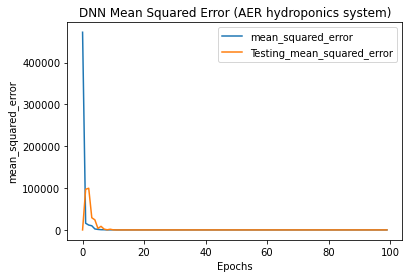

In [77]:
#Visualisation of the AER DNN model
def plot_history(history, key):
    plt.plot(history.history[key])
    plt.plot(history.history['val_' + key])
    plt.title('DNN Mean Squared Error (AER hydroponics system)')
    plt.xlabel("Epochs")
    plt.ylabel(key)
    plt.legend([key, 'Testing_' + key])
    plt.show()

# Plot the history
plot_history(history, 'mean_squared_error')